In [2]:
from qutip import *
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
for x in np.linspace(-np.pi, np.pi, 11):
    print(np.abs(rz(x).tr()) / 2)

6.123233995736766e-17
0.30901699437494745
0.5877852522924731
0.8090169943749475
0.9510565162951535
1.0
0.9510565162951535
0.8090169943749475
0.5877852522924731
0.30901699437494745
6.123233995736766e-17


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  


In [103]:
M = 100000

In [133]:
error_samples = np.random.normal(0, np.pi / 4, M) + np.pi / 4

integrals = []

xs = np.linspace(-np.pi, np.pi, 100)

for x in xs:
    integrals.append(np.mean(np.power(np.cos(error_samples + x), 2)))

print(integrals)

[0.4986287741039523, 0.4804131070337691, 0.46251260040353903, 0.4452152800657895, 0.4287994663798064, 0.4135292959328665, 0.39965047148367283, 0.3873863085129895, 0.3769341419939625, 0.3684621511985301, 0.3621066536299825, 0.3579699116233046, 0.3561184869059248, 0.3565821695946056, 0.3593534988613116, 0.36438788298072666, 0.37160431682780604, 0.38088668528056185, 0.39208563155584214, 0.4050209604158819, 0.4194845375771328, 0.4352436386687979, 0.4520446938550752, 0.46961736786873726, 0.48767890980677764, 0.5059387026982844, 0.5241029396402912, 0.5418793512608294, 0.5589819084425313, 0.5751354246381991, 0.5900799837253627, 0.6035751221539876, 0.6154036980950083, 0.6253753853336437, 0.6333297356894383, 0.6391387606875485, 0.6427089909412139, 0.6439829801091784, 0.6429402292288265, 0.6395975165521648, 0.6340086275774663, 0.62626348962047, 0.6164867248502064, 0.6048356450716478, 0.5914977205198777, 0.5766875633938315, 0.5606434746656782, 0.5436236097289723, 0.5259018245817343, 0.50776326938

In [134]:
print(np.pi / 4)

0.7853981633974483


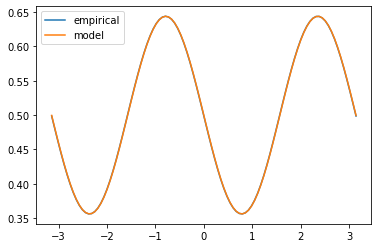

In [136]:
plt.figure()
plt.plot(xs, integrals, label="empirical")
plt.plot(xs, (1 - 2 * np.min(integrals)) * np.power(np.cos(xs + np.mean(error_samples)), 2) + np.min(integrals), label="model")
plt.legend()
plt.show()

In [137]:
M = 100000
error_samples = np.random.lognormal(0, np.pi / 4, M) - 1

integrals = []

xs = np.linspace(- np.pi, np.pi, 100)

for x in xs:
    integrals.append(np.mean(np.power(np.cos(error_samples + x), 2)))

print(integrals)

[0.7053669772023176, 0.7122382886801291, 0.7156946066441338, 0.7156803176444586, 0.7121956515964567, 0.7052966780812854, 0.6950944041653541, 0.6817529882550735, 0.6654870987266441, 0.6465584598315257, 0.6252716404552574, 0.6019691534900772, 0.5770259446742713, 0.5508433595748864, 0.5238426857873192, 0.4964583742602012, 0.4691310488170031, 0.4423004163537733, 0.4163981917905818, 0.3918411516168478, 0.36902442780160993, 0.34831514997223145, 0.3300465381612653, 0.31451254117139293, 0.30196310682915317, 0.292600160230848, 0.28657435469215453, 0.28398264767988096, 0.2848667407300301, 0.2892124084544752, 0.2969497274327795, 0.30795420130620643, 0.3220487639707354, 0.33900662863695774, 0.3585549369144141, 0.3803791492052376, 0.4041281057640274, 0.42941967698960676, 0.4558469120333491, 0.4829845867906716, 0.5103960459160548, 0.5376402287710096, 0.5642787662548554, 0.5898830343276493, 0.6140410507314394, 0.6363641039390151, 0.6564930076678902, 0.6741038803220455, 0.6889133563680493, 0.700683145

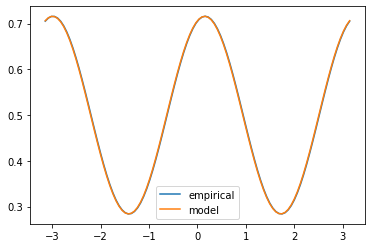

In [138]:
plt.figure()
plt.plot(xs, integrals, label="empirical")
plt.plot(xs, (1 - 2 * np.min(integrals)) * np.power(np.cos(xs - 0.15), 2) + np.min(integrals), label="model")
plt.legend()
plt.show()

In [142]:
from scipy.stats import moment

print(np.mean(error_samples))

for i in range (2, 6):
    print(moment(error_samples, moment=i), moment(np.power(np.cos(error_samples), 2), moment=i))

0.36280026979320923
1.6136712915208706 0.08383350809284452
7.549685707085924 -0.024909685000145086
85.15182791924035 0.021114015391557987
1381.8976187993446 -0.011673042631848223


In [124]:
from scipy.stats import skew

In [125]:
skew(error_samples)

3.707835580965624

In [127]:
print(np.exp(np.pi **2 / 32) - 1)
print(np.mean(error_samples))

0.36127959698544054
0.362115451671189


In [130]:
(np.exp(np.pi **2 / 16) - 1) * np.exp( np.pi **2 / 16 )

1.580831280750062

In [44]:
from scipy.stats import skewnorm

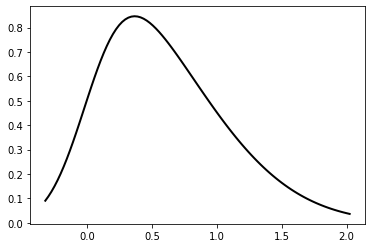

In [52]:
a = np.pi
x = np.linspace(skewnorm.ppf(0.01, a, scale=np.pi/4),
                 skewnorm.ppf(0.99, a, scale=np.pi/4), 100)
rv = skewnorm(a, scale=np.pi/4)

plt.figure()
plt.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
plt.show()

In [101]:
error_samples = np.random.noncentral_chisquare(np.pi / 2, np.pi / 4, M)

integrals = []

xs = np.linspace(- np.pi, np.pi, 100)

for x in xs:
    integrals.append(np.mean(np.power(np.cos(error_samples + x), 2)))

print(integrals)
print(np.mean(error_samples))

[0.5491736168630994, 0.5357578255682669, 0.5217666774745137, 0.5074252953920918, 0.49296443752723806, 0.4786167844962522, 0.46461319540728063, 0.451178993250846, 0.4385303393685833, 0.4268707553363351, 0.41638784822581043, 0.40725029193657225, 0.39960511316985287, 0.3935753257138928, 0.38925795110603956, 0.3867224575198925, 0.3860096419963854, 0.3871309740041259, 0.3900684108913516, 0.39477468819895156, 0.4011740801633064, 0.4091636181721712, 0.41861474756819245, 0.4293753961414674, 0.4412724210283282, 0.4541143946448314, 0.46769468482824406, 0.4817947796258905, 0.4961878032342696, 0.5106421665156609, 0.5249252933540435, 0.538807362891865, 0.5520650074336698, 0.5644849065159347, 0.5758672193131811, 0.5860288001516641, 0.5948061453918225, 0.602058024263045, 0.6076677513196365, 0.6115450639533203, 0.6136275747523936, 0.613881775338535, 0.6123035755291568, 0.6089183691499727, 0.6037806254388365, 0.596973012615315, 0.58860506771809, 0.5788114341130006, 0.567749695030886, 0.5555978379944118

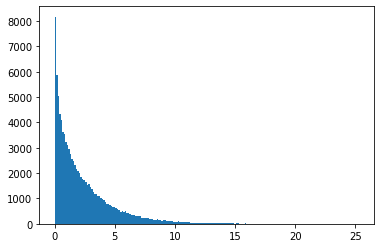

In [100]:
plt.hist(error_samples, bins=200)
plt.show()

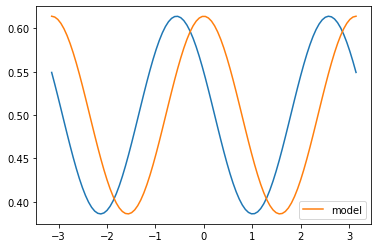

In [102]:
plt.figure()
plt.plot(xs, integrals)
plt.plot(xs, (1 - 2 * np.min(integrals)) * np.power(np.cos(xs - np.mean()), 2) + np.min(integrals), label="model")
plt.legend()
plt.show()